# DATA SCIENCE / CODERHOUSE
  ENTREGA FINAL - LETICIA FONTANA-

* Análisis y entrenamientos de modelos.*

  METODO ÁRBOL DE DECISIÓN



Cargamos el datset y utilizamos el metodo del ábol de decisión para que nos realice una segmentación de los datos. Determinamos la variables G3 como la variable objetivo para obtener una clasificación según las calificaciones finales de los alumnos.

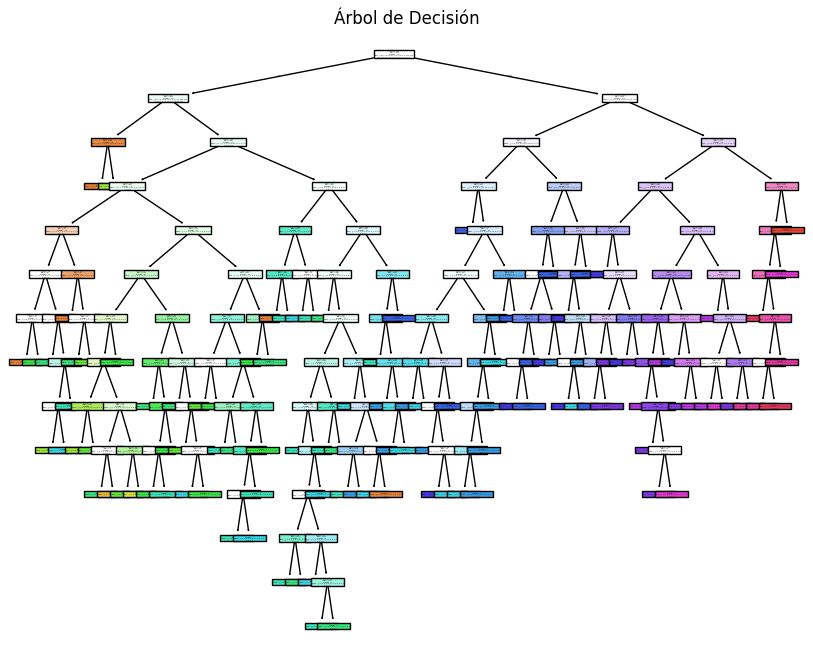

Tasa de precisión: 0.38


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder

# Cargar el dataset
url = 'https://raw.githubusercontent.com/LetiRenguera/Pre-entrega-DataScience1CH/main/student-mat.csv'
df = pd.read_csv(url)

# Definir las características y la variable objetivo
X = df.drop('G3', axis=1)  # Todas las columnas menos 'G3'
y = df['G3']               # La columna 'G3'

# Convertir variables categóricas en numéricas
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y ajustar el modelo
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Visualizar el árbol de decisión
plt.figure(figsize=(10, 8))
plot_tree(tree_model, filled=True)
plt.title("Árbol de Decisión")
plt.show()

# Evaluar el modelo
accuracy = tree_model.score(X_test, y_test)
print(f'Tasa de precisión: {accuracy:.2f}')

Análisis: Lo que obtuvimos es un árbol con muchos nodos y ramas y con bastante profundidad lo que no nos permite identificar claramente los resultados que estamos buscando. La tasa de precisión de 0.38 indica que las predicciones realizadas no son demasiado correctas.

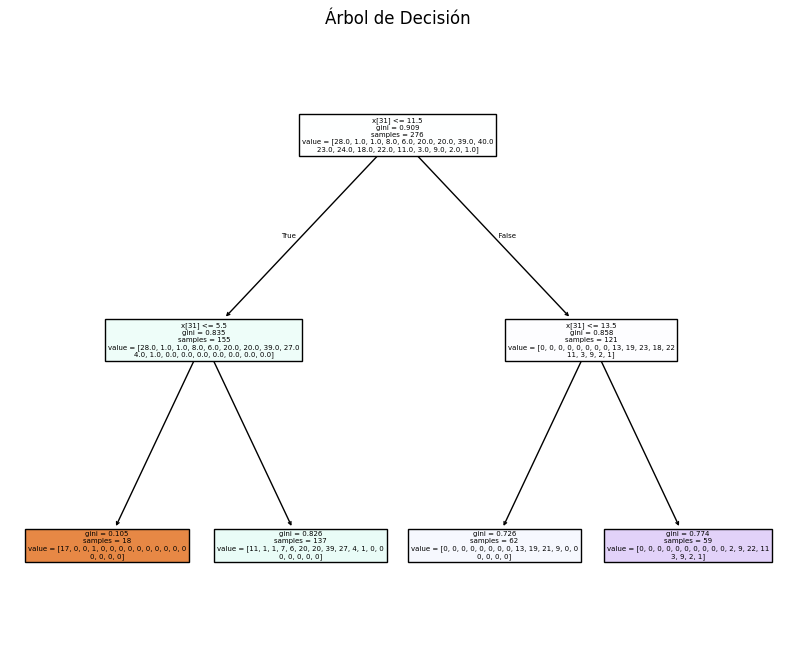

Tasa de precisión: 0.29


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder

# Cargar el dataset
url = 'https://raw.githubusercontent.com/LetiRenguera/Pre-entrega-DataScience1CH/main/student-mat.csv'
df = pd.read_csv(url)

# Definir las características y la variable objetivo
X = df.drop('G3', axis=1)  # Todas las columnas menos 'G3'
y = df['G3']               # La columna 'G3'

# Convertir variables categóricas en numéricas
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y ajustar el modelo
tree_model = DecisionTreeClassifier(random_state=1234, max_depth=2)
tree_model.fit(X_train, y_train)

# Visualizar el árbol de decisión
plt.figure(figsize=(10, 8))
plot_tree(tree_model, filled=True)
plt.title("Árbol de Decisión")
plt.show()

# Evaluar el modelo
accuracy = tree_model.score(X_test, y_test)
print(f'Tasa de precisión: {accuracy:.2f}')

Análisis: Incluimos hiperparametros para ajustar el árbol, utilizando (random_state=1234, max_depth=2), pero aun asi, la tasa de precisión disminuye.

Para buscar una mejor predicción del árbol, establecemos nuevos"features" para aquellas caracteristicas de interes. Determinamos la variable objetivo y definimos que para la categoria G3 mayores a 10, sea clasificados como "aprobado", y los menores de 10 como "no aprobado".

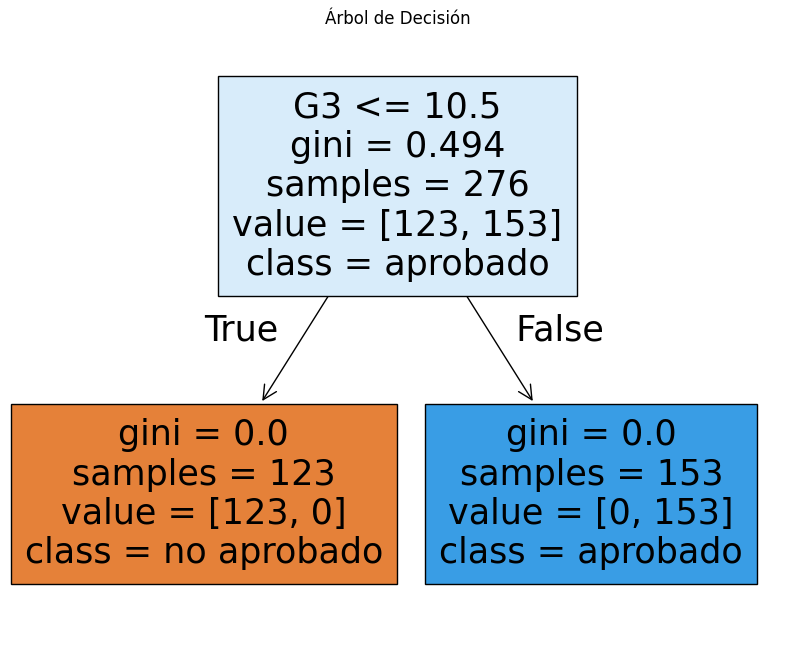

Tasa de precisión: 1.00


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder

# Cargar el dataset
url = 'https://raw.githubusercontent.com/LetiRenguera/Pre-entrega-DataScience1CH/main/student-mat.csv'
df = pd.read_csv(url)

# Seleccionar las características que vamos a utilizar
feature_columns = ['age', 'studytime', 'failures', 'absences', 'G1', 'G2', 'G3']
X = df[feature_columns]

# Variable objetivo (aprobado/no aprobado)
y = (df['G3'] > 10).astype(int)

# Convertir variables categóricas en numéricas
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y ajustar el modelo
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Visualizar el árbol de decisión
plt.figure(figsize=(10, 8))
plot_tree(tree_model, feature_names=feature_columns, class_names=['no aprobado', 'aprobado'], filled=True)
plt.title("Árbol de Decisión")
plt.show()

# Evaluar el modelo
accuracy = tree_model.score(X_test, y_test)
print(f'Tasa de precisión: {accuracy:.2f}')


 Analisis: El árbol arroja una coeficiente de Gini = 0, lo cual estaria indicando que la segmentación de los datos es mayormente pura. Además, la tasa de precisión = 1 , que el modelo se ajusta a una correcta predicción. Existen 276 datos de 395 en total. lo que nos da un 70% de datos entrenados.

En este caso, queremos ver como se comporta el árbol al cargar el dataset pero seleccionar como FEATURE solo la variable Medu, que corresponde a la educación de la madre.

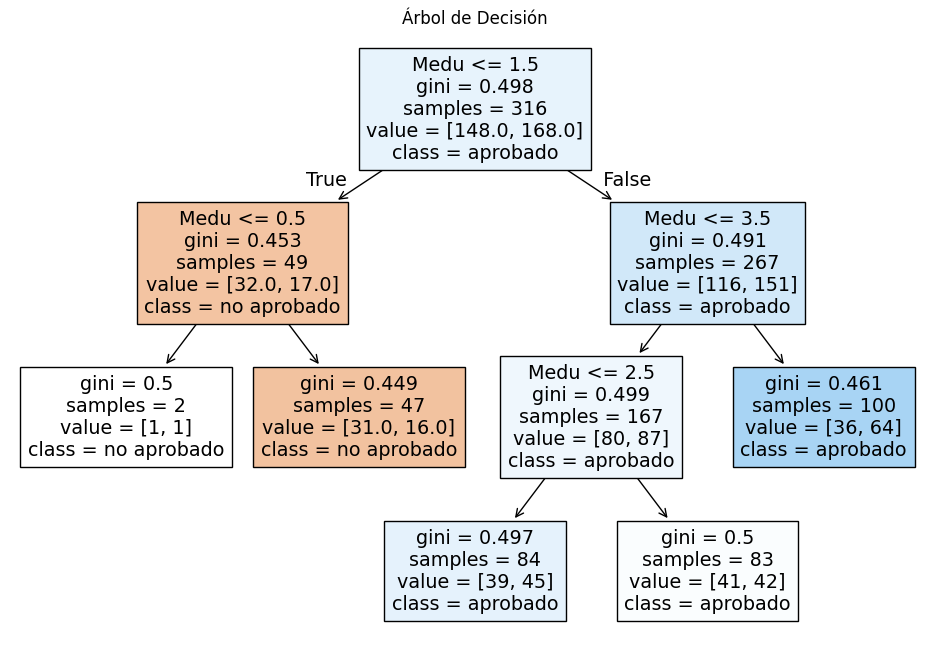

Tasa de precisión: 0.53


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder

# Cargar el dataset
url = 'https://raw.githubusercontent.com/LetiRenguera/Pre-entrega-DataScience1CH/main/student-mat.csv'
df = pd.read_csv(url)

# Seleccionar las características que vamos a utilizar
feature_columns = [ 'Medu']
X = df[feature_columns]

# Variable objetivo (aprobado/reprobado)
y = (df['G3'] > 10).astype(int)

# Convertir variables categóricas en numéricas
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y ajustar el modelo
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Visualizar el árbol de decisión
plt.figure(figsize=(12, 8))
plot_tree(tree_model, feature_names=feature_columns, class_names=['no aprobado', 'aprobado'], filled=True)
plt.title("Árbol de Decisión")
plt.show()

# Evaluar el modelo
accuracy = tree_model.score(X_test, y_test)
print(f'Tasa de precisión: {accuracy:.2f}')

En este árbol, podemos observar que según el coeficiente de Gini que varia entre 0.4 y 0.5, los datos para obtener la clasificación de los nodos contiene mas impurezas y la tasa de precisión en 0.53 nos indica que el modelo puede tener algunas imprecisiones.

Lista feature 0 y 1 7 atriututos analizar

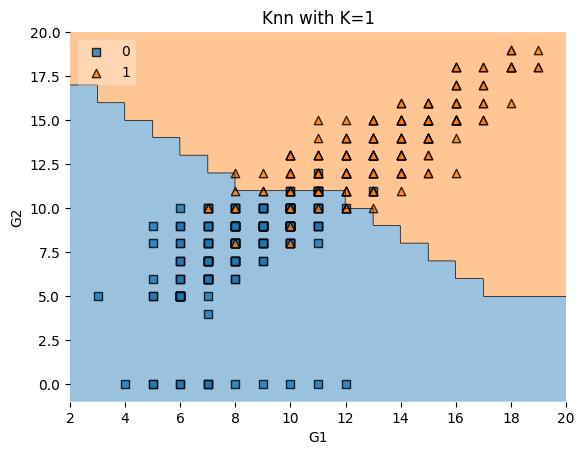

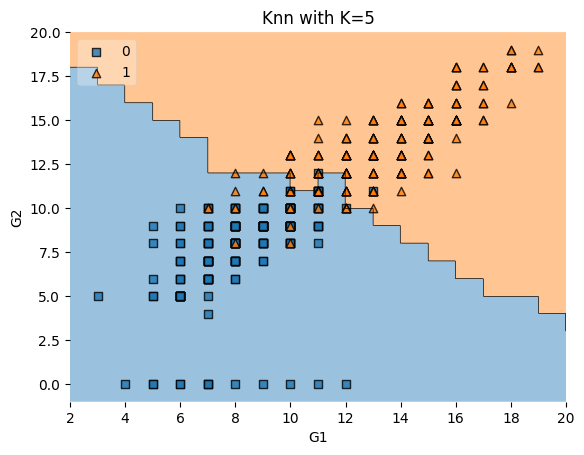

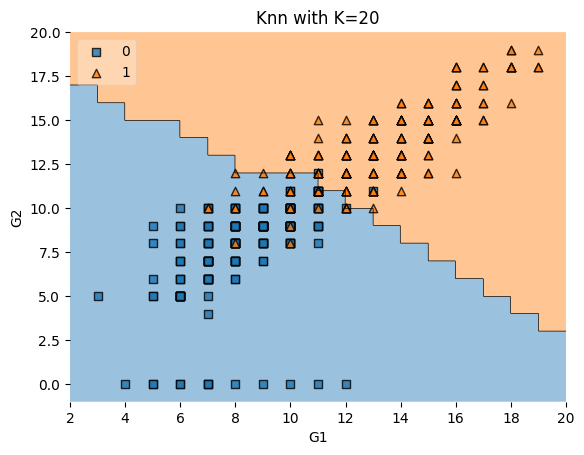

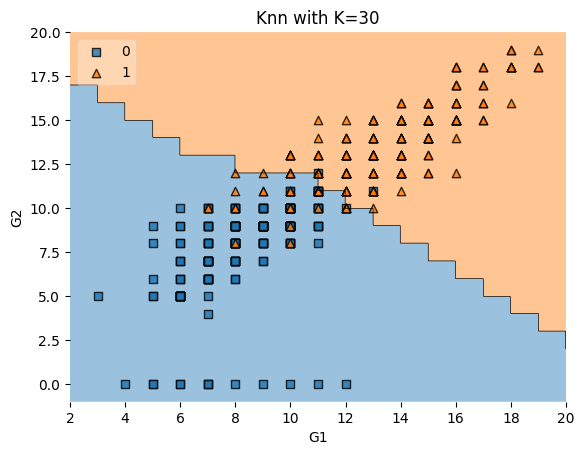

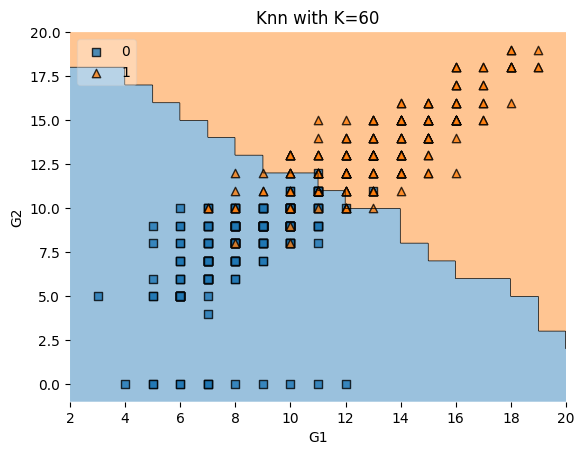

In [20]:
!pip install mlxtend
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions

def knn_comparison(data, k, features=['G1', 'G2']): # function comparison, adding features parameter with default values
    x = data[features].values  # Extracting columns using the features parameter
    y = (data['G3'] > 10).astype(int).values  # Class and as int
    clf = neighbors.KNeighborsClassifier(n_neighbors=k) #algorithm
    clf.fit(x, y) # Plotting decision regions
    plot_decision_regions(x, y, clf=clf, legend=2) # Adding annotations
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.title('Knn with K='+ str(k))
    plt.show()

# Loading and applying function
url = 'https://raw.githubusercontent.com/LetiRenguera/Pre-entrega-DataScience1CH/main/student-mat.csv'
df = pd.read_csv(url)

for i in [1,5,20,30,60]: # For different k values (Knn)
    knn_comparison(df, i) # Calling knn_comparison with df and i

Análisis KNN: A medida que sumamos K = n,  Las variables G1 (Calificación parcial 1) y G2 (calificación parcial 2) representan el resultado de G3, se encuentra que la frontera de decisión toma una figura cada vez mas escalonada, podria interpretarse que es dificil para el modelo realizar predicciones en el segmento generando cambios abruptos.

In [8]:
! pip install chart_studio
! pip install bqplot
! pip install pingouin

import pandas                  as pd
from   scipy import stats
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.formula.api as sm
import chart_studio.plotly     as py
# https://community.plot.ly/t/solved-update-to-plotly-4-0-0-broke-application/26526/2
import os

#%matplotlib inline
#plt.style.use('ggplot')
from bokeh.resources import INLINE
import bokeh.io
from bokeh import *
import pingouin
bokeh.io.output_notebook(INLINE)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 6.1 MB/s eta 0:00:00


In [9]:
# Cargar el dataset
url = 'https://raw.githubusercontent.com/LetiRenguera/Pre-entrega-DataScience1CH/main/student-mat.csv'
df = pd.read_csv(url)

In [10]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [21]:
df["condición"] = np.where(df['G3'] > 10, "aprobado" , "no aprobado")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,condición
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,no aprobado
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,no aprobado
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,no aprobado
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,aprobado
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,no aprobado


# Modelo de clasificación y matriz de confusión.

Utilizando la nueva columna creada en el dataset "condición", realizamos un modelo de clasificación en Aprobado y No Aprobado.

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Ejemplo de DataFrame
data = {
    'G3': [12, 9, 15, 7, 10, 14, 11, 8, 13, 5],
    'other_feature_1': [1, 2, 2, 3, 2, 1, 3, 2, 1, 3],  # Otras características
    'other_feature_2': [0, 1, 0, 1, 0, 0, 1, 1, 0, 0],  # Otras características
}
df = pd.DataFrame(data)

# Asignar la condición de aprobado/no aprobado
df["condición"] = np.where(df['G3'] > 10, "aprobado", "no aprobado")

# Convertir la variable objetivo a numérica
df['condición'] = df['condición'].map({'aprobado': 1, 'no aprobado': 0})

# Definir las características (X) y la variable objetivo (y)
X = df.drop(columns=["G3", "condición"])  # Características
y = df["condición"]  # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo de árbol de decisión
model = DecisionTreeClassifier()

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[1 0]
 [0 1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



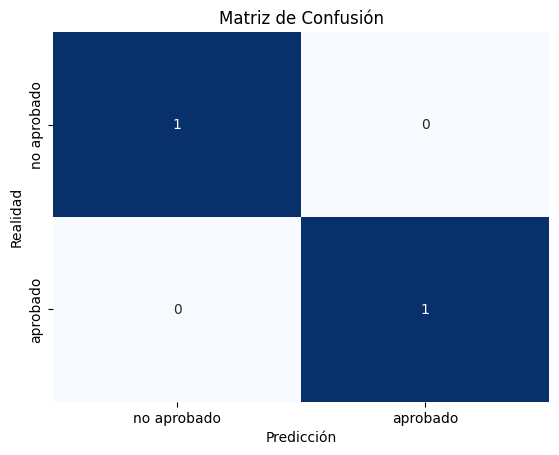

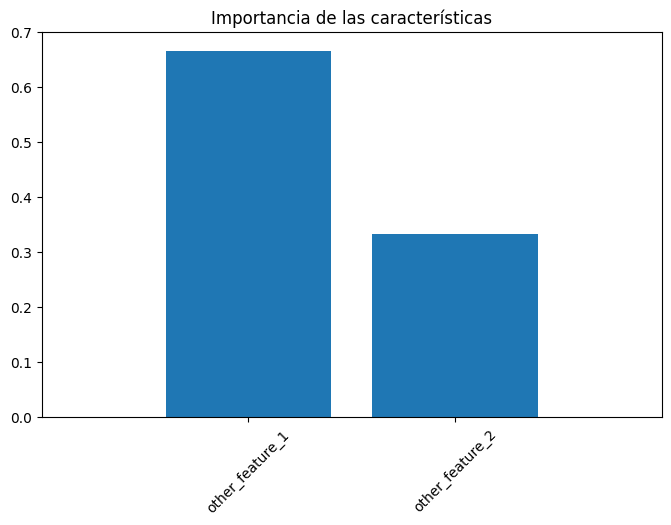

In [25]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Graficar la matriz de confusión
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=["no aprobado", "aprobado"],
                yticklabels=["no aprobado", "aprobado"])
    plt.xlabel('Predicción')
    plt.ylabel('Realidad')
    plt.title('Matriz de Confusión')
    plt.show()

# Llamar a la función
plot_confusion_matrix(y_test, y_pred)
# Graficar la importancia de las características
def plot_feature_importances(model, features):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(8, 5))
    plt.title("Importancia de las características")
    plt.bar(range(X.shape[1]), importances[indices], align="center")
    plt.xticks(range(X.shape[1]), features.columns[indices], rotation=45)
    plt.xlim([-1, X.shape[1]])
    plt.show()

# Llamar a la función
plot_feature_importances(model, X)


Visualizaciones en boxplot de califiaciones por edad y género

<ipython-input-12-44ca13cb02aa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex', y='G3', data=df, palette="viridis")


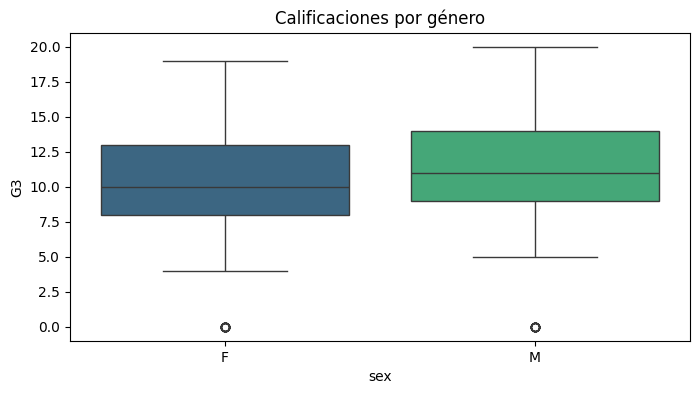

In [12]:

plt.figure(figsize=(8, 4))
sns.boxplot(x='sex', y='G3', data=df, palette="viridis")
plt.title("Calificaciones por género")
plt.show()


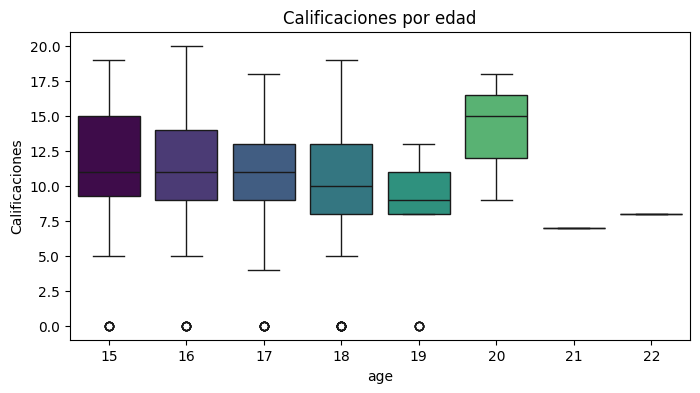

In [13]:


plt.figure(figsize=(8,4))
melted_df = df.melt(value_vars=['G3'], id_vars=['age'], var_name='Variable', value_name="Calificaciones")
sns.boxplot(data=melted_df, x='age', y='Calificaciones', hue='age', palette='viridis', dodge=False)
plt.title("Calificaciones por edad")
plt.legend([],[], frameon=False) # Removing legend
plt.show()


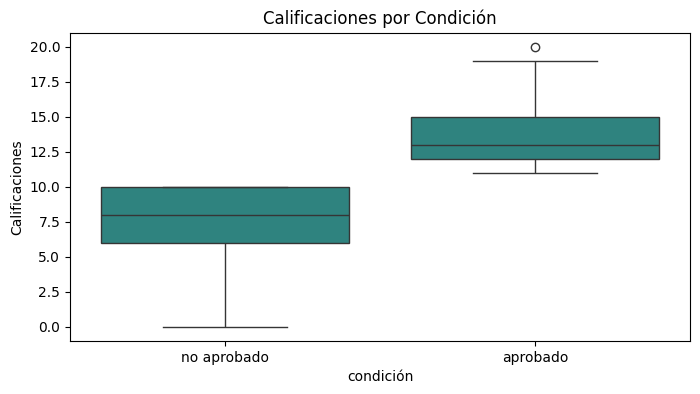

In [14]:
plt.figure(figsize=(8,4))
melted_df = df.melt(value_vars=['G3'], id_vars=['condición'], var_name='Condición', value_name="Calificaciones")
sns.boxplot(data=melted_df, x='condición', y='Calificaciones', hue='Condición', palette='viridis', dodge=False)
plt.title("Calificaciones por Condición")
plt.legend([],[], frameon=False) # Removing legend
plt.show()

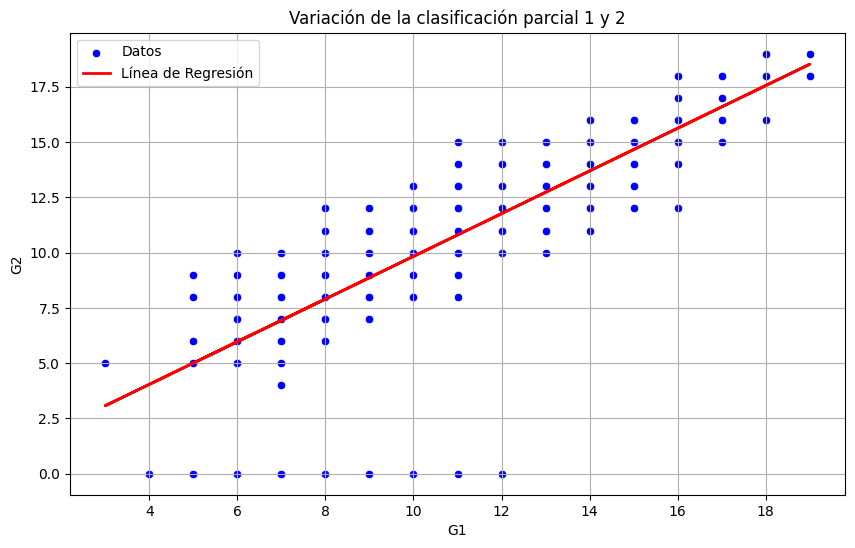

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Cargar el dataset
url = 'https://raw.githubusercontent.com/LetiRenguera/Pre-entrega-DataScience1CH/main/student-mat.csv'
df = pd.read_csv(url)

# Define x and y
x = "G1"
y = "G2"
# Crear un DataFrame
df_subset = df[[x,y]] #Select G1 and G2 columns from the existing df

# Ajustar la regresión lineal
model = LinearRegression()
model.fit(df_subset[[x]], df_subset[y])
y_pred = model.predict(df_subset[[x]])

# Crear el gráfico de dispersión y la línea de regresión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_subset, x=x, y=y, color='blue', label='Datos')
plt.plot(df_subset[x], y_pred, color='red', linewidth=2, label='Línea de Regresión')
plt.title("Variación de la clasificación parcial 1 y 2")
plt.xlabel(x)
plt.ylabel(y)
plt.legend()
plt.grid(True)
plt.show()

Análisis de linea de regresión: El resultado de la primera calificación tiene menor distancia que los datos de la segunda calificación.

# Regresión Lineal

Mediante la modelización de regresión lineal verificamos que relación hay con los aprobados según la edad y el género.


In [15]:
import statsmodels.formula.api as sm

model1 = 'age~G3'
lm1   = sm.ols(formula = model1, data = df).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     10.54
Date:                Sat, 22 Feb 2025   Prob (F-statistic):            0.00127
Time:                        21:38:41   Log-Likelihood:                -651.04
No. Observations:                 395   AIC:                             1306.
Df Residuals:                     393   BIC:                             1314.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.1649      0.158    108.826      0.0

In [17]:
model2 = 'G3~age + sex'
lm2    = sm.ols(formula = model2, data = df).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     7.295
Date:                Sat, 22 Feb 2025   Prob (F-statistic):           0.000775
Time:                        21:44:44   Log-Likelihood:                -1154.0
No. Observations:                 395   AIC:                             2314.
Df Residuals:                     392   BIC:                             2326.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.5024      2.997      6.508      0.0

Análisis: Para analizar el modelo, sobre la variable dependiente G3 (calificación final) y las variables independientes edad y género, observamos que R2 (0.036) es bastante cercano a cero, y por lo tanto puede sugerir que el modelo no se ajusta del todo en la relación de las variables independientes. La variable Sex presenta un P-valor = 0.047, lo que indicaria una relación significativa en la que los estudiantes masculinos tendrian una nota mas alta respecto de las estudiantes mujeres. el indice Jarque-Bera (JB) sugiere que los residuos no siguen una distribución normal. Por lo tanto, se concluye que este modelo no cumple en su totalidad con los supuestos de la regresión y su poder predictivo pierde fuerza.